# Introduction

<b>Objective:</b> Evaluate the potential for substance abuse in patients undergoing drug treatment by analyzing demographic data, personality traits, and prior drug use history through AI and machine learning methodologies. And use GizaTech's Orion Library to produce verifiable ML models.

In the introductory phase, we will load and preprocess the dataset, addressing any missing values and data type discrepancies. This will be followed by an exploratory data analysis (EDA) to derive statistical insights on key features and to visualize data distributions and inter-feature relationships.

## Dataset Information

Database contains records for 1885 respondents. For each respondent 12 attributes are known: Personality measurements which include NEO-FFI-R (neuroticism, extraversion, openness to experience, agreeableness, and conscientiousness), BIS-11 (impulsivity), and ImpSS (sensation seeking), level of education, age, gender, country of residence and ethnicity. All input attributes are originally categorical and are quantified. After quantification values of all input features can be considered as real-valued. In addition, participants were questioned concerning their use of 18 legal and illegal drugs (alcohol, amphetamines, amyl nitrite, benzodiazepine, cannabis, chocolate, cocaine, caffeine, crack, ecstasy, heroin, ketamine, legal highs, LSD, methadone, mushrooms, nicotine and volatile substance abuse and one fictitious drug (Semeron) which was introduced to identify over-claimers. For each drug they have to select one of the answers: never used the drug, used it over a decade ago, or in the last decade, year, month, week, or day.

Detailed description of database and process of data quantification are presented in E. Fehrman, A. K. Muhammad, E. M. Mirkes, V. Egan and A. N. Gorban, "The Five Factor Model of personality and evaluation of drug consumption risk.," arXiv [Web Link], 2015
Paper above solve binary classification problem for all drugs. For most of drugs sensitivity and specificity are greater than 75%

Since all of the features have been quantified into real values please refer to the link to the original dataset to get more clarity on categorical variables. For example, for EScore (extraversion) 9 people scored 55 which corresponds to a quantified (real) value of in the dataset 2.57309. I have also converted some variables back into their categorical values which are included in the drug_consumption.csv file

## Feature Attributes

**1. ID:** is a number of records in an original database. Cannot be related to the participant. It can be used for reference only.  
**2. Age (Real):** is the age of participant  
**3. Gender:** Male or Female  
**4. Education:** level of education of participant  
**5. Country:** country of origin of the participant  
**6. Ethnicity:** ethnicity of participant  
**7. Nscore (Real):** is NEO-FFI-R Neuroticism  
**8. Escore (Real):** is NEO-FFI-R Extraversion  
**9. Oscore (Real):** is NEO-FFI-R Openness to experience.  
**10. Ascore (Real):** is NEO-FFI-R Agreeableness.  
**11. Cscore (Real):** is NEO-FFI-R Conscientiousness.  
**12. Impulsive (Real):** is impulsiveness measured by BIS-11  
**13. SS (Real):** is sensation seeing measured by ImpSS  
**14. Alcohol:** alcohol consumption  
**15. Amphet:** amphetamines consumption  
**16. Amyl:** nitrite consumption  
**17. Benzos:** benzodiazepine consumption  
**18. Caff:** caffeine consumption  
**19. Cannabis:** marijuana consumption  
**20. Choc:** chocolate consumption  
**21. Coke:** cocaine consumption  
**22. Crack:** crack cocaine consumption  
**23. Ecstasy:** ecstasy consumption  
**24. Heroin:** heroin consumption  
**25. Ketamine:** ketamine consumption  
**26. Legalh:** legal highs consumption  
**27. LSD:** LSD consumption  
**28. Meth:** methadone consumption  
**29. Mushroom:** magic mushroom consumption  
**30. Nicotine:** nicotine consumption  
**31. Semer:** class of fictitious drug Semeron consumption (i.e. control)  
**32. VSA:** class of volatile substance abuse consumption  


## Rating's for Drug Use:

- **CL0:** Never Used
- **CL1:** Used over a Decade Ago
- **CL2:** Used in Last Decade
- **CL3:** Used in Last Year
- **CL4:** Used in Last Month
- **CL5:** Used in Last Week
- **CL6:** Used in Last Day

For more information about the dataset visit the following link: [Drug Consumption (UCI)](https://www.kaggle.com/datasets/obeykhadija/drug-consumptions-uci)

# Chapter 1: Training the Python Models

In [1]:
#!pip install giza-actions giza-cli
#!pip install --upgrade --no-deps giza-cli

In [2]:
import pandas as pd

# Load the dataset
file_path = 'Drug_Consumption.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,2,25-34,M,Doctorate degree,UK,White,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
1,3,35-44,M,Professional certificate/ diploma,UK,White,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
2,4,18-24,F,Masters degree,UK,White,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
3,5,35-44,F,Doctorate degree,UK,White,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
4,6,65+,F,Left school at 18 years,Canada,White,-0.67825,-0.30033,-1.55521,2.03972,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0


In [3]:
# Checking for missing values
missing_values = data.isnull().sum()

# Analyzing the distribution of demographic information
age_distribution = data['Age'].value_counts()
gender_distribution = data['Gender'].value_counts()
education_distribution = data['Education'].value_counts()
country_distribution = data['Country'].value_counts()
ethnicity_distribution = data['Ethnicity'].value_counts()

# Displaying the results of the missing values and demographic distributions
missing_values, age_distribution, gender_distribution, education_distribution, country_distribution, ethnicity_distribution


(ID           0
 Age          0
 Gender       0
 Education    0
 Country      0
 Ethnicity    0
 Nscore       0
 Escore       0
 Oscore       0
 AScore       0
 Cscore       0
 Impulsive    0
 SS           0
 Alcohol      0
 Amphet       0
 Amyl         0
 Benzos       0
 Caff         0
 Cannabis     0
 Choc         0
 Coke         0
 Crack        0
 Ecstasy      0
 Heroin       0
 Ketamine     0
 Legalh       0
 LSD          0
 Meth         0
 Mushrooms    0
 Nicotine     0
 Semer        0
 VSA          0
 dtype: int64,
 Age
 18-24    643
 25-34    481
 35-44    355
 45-54    294
 55-64     93
 65+       18
 Name: count, dtype: int64,
 Gender
 M    943
 F    941
 Name: count, dtype: int64,
 Education
 Some college or university, no certificate or degree    506
 University degree                                       480
 Masters degree                                          283
 Professional certificate/ diploma                       269
 Left school at 18 years                     

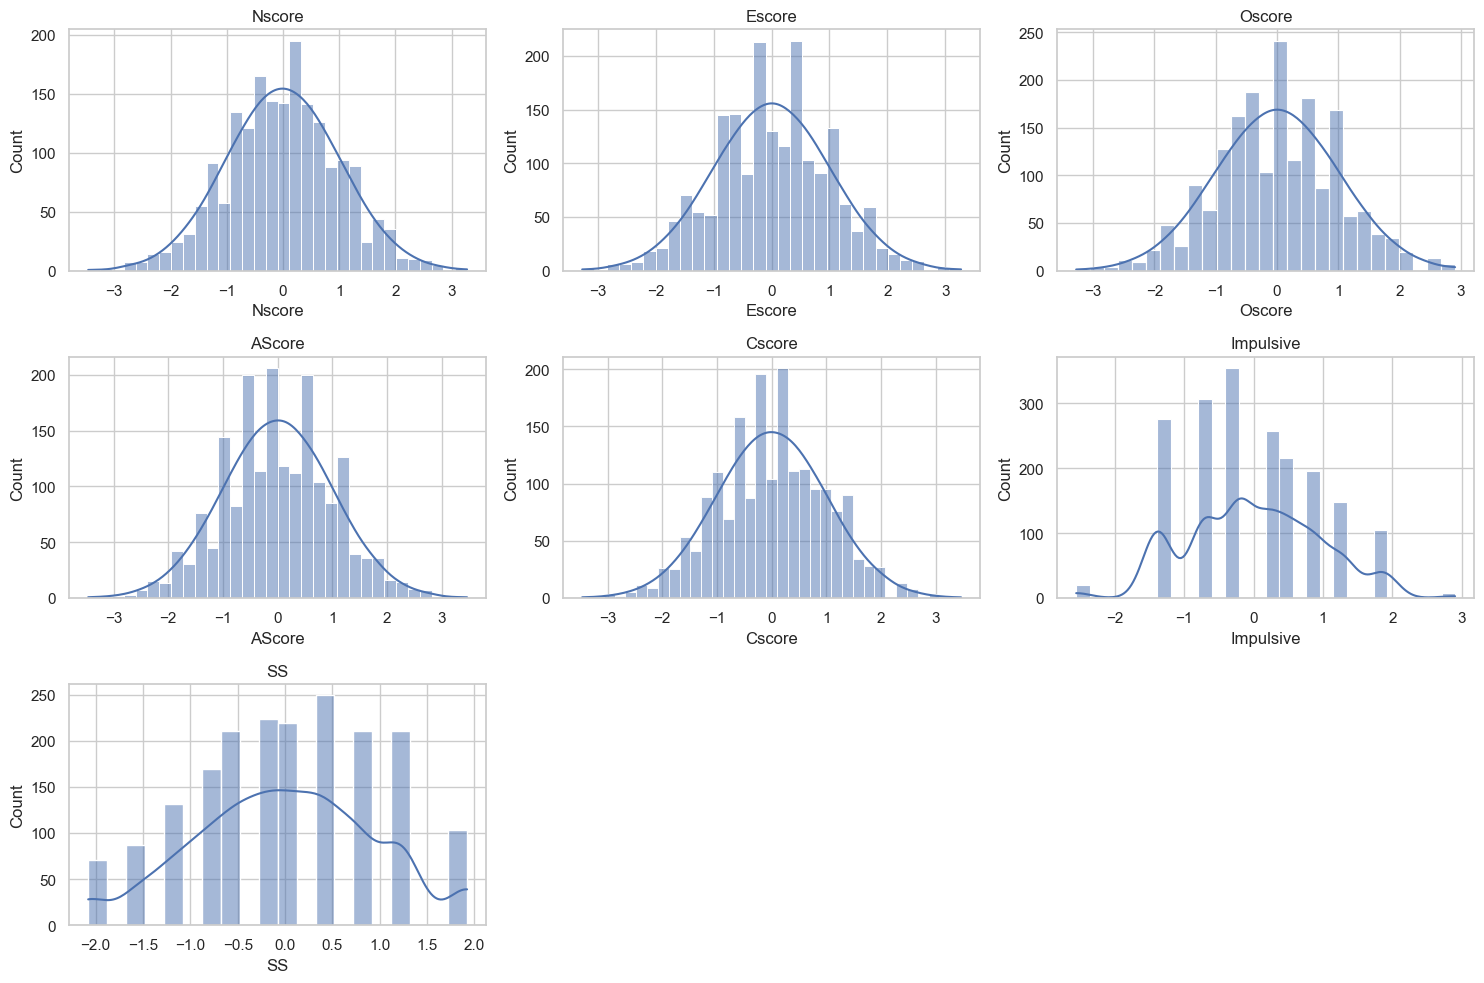

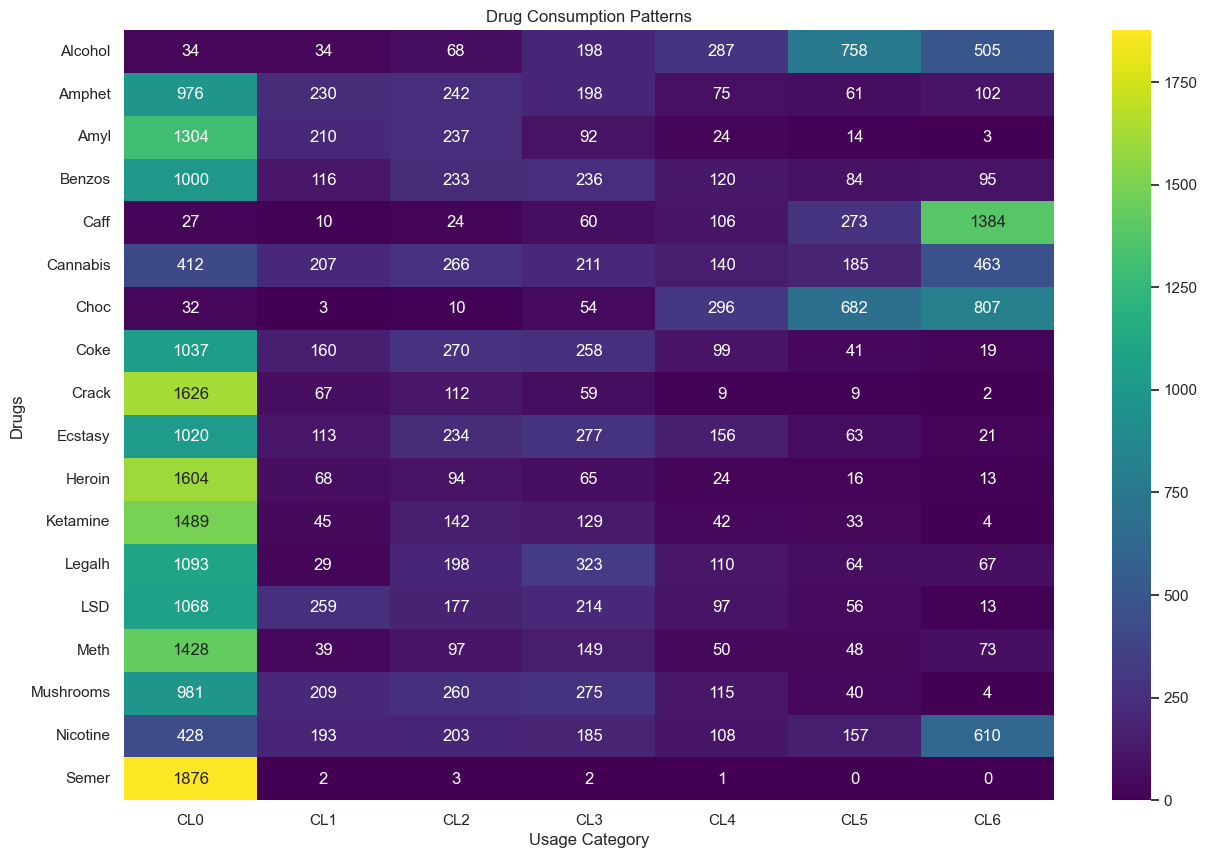

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Personality scores distribution
personality_scores = ['Nscore', 'Escore', 'Oscore', 'AScore', 'Cscore', 'Impulsive', 'SS']
plt.figure(figsize=(15, 10))

for i, column in enumerate(personality_scores, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data[column], kde=True)
    plt.title(column)

plt.tight_layout()
plt.show()

# Drug consumption patterns
drug_columns = data.columns[13:-1] 

# Count of each category per drug
drug_usage = data[drug_columns].apply(pd.Series.value_counts).T
drug_usage_int = drug_usage.fillna(0).astype(int)

# Plotting drug consumption patterns
plt.figure(figsize=(15, 10))
sns.heatmap(drug_usage_int, cmap="viridis", annot=True, fmt="d")
plt.title("Drug Consumption Patterns")
plt.ylabel("Drugs")
plt.xlabel("Usage Category")
plt.show()

# Feature Engineering and Selection 

This section focuses on developing new features from the existing dataset and applying one-hot encoding to categorical variables, optimizing them for model training and evaluation.

In [5]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Initialize LabelEncoder
label_encoder = LabelEncoder()

columns_to_encode = ['Alcohol', 'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack',
                'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms', 'Nicotine', 'Semer', 'VSA',
                     'Age', 'Gender', 'Education', 'Country', 'Ethnicity']

# List of all drug columns
drug_columns = [col for col in data.columns if col not in ['ID', 'Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore', 'Escore', 'Oscore', 'AScore', 'Cscore', 'Impulsive', 'SS']]

# List of additional variables to include in the features
additional_variables = ['Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore', 'Escore', 'Oscore', 'AScore', 'Cscore', 'Impulsive', 'SS']

# Dictionary to store the training and testing sets for each drug
datasets = {}

# Preparing datasets for each drug
for drug in drug_columns:
    # Features: demographic, personality scores, and other drug columns except the current one
    feature_columns = additional_variables + [d for d in drug_columns if d != drug]
    X = data[feature_columns]
    #print(X.columns) #Columns to predict
    X = pd.get_dummies(X, columns=columns_to_encode.remove(drug)) #do one hot encoding

    # Convert current drug consumption into binary format
    # Target
    y = data[drug].apply(lambda x: 0 if x == 'CL0' else 1)

    # Splitting data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Store the datasets
    datasets[drug] = (X_train, X_test, y_train, y_test)

# We can now iterate over the datasets dictionary to train and evaluate models for each drug

# Model Building

In this segment, we will construct individual predictive models for each of the 19 drugs of interest, utilizing the cleaned and preprocessed training data. We employ scikit-learn as our primary toolkit for model development. To enhance the robustness of our predictions, we will implement four distinct machine learning algorithms—**Logistic Regression, Random Forest Classifier, SVM, and KNN**—with both default parameters and hyperparameters for each drug model thus producing a total count of 76 models.

In [6]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt

# Initialize models
log_reg = LogisticRegression(max_iter=1000, random_state=42)
random_forest = RandomForestClassifier(random_state=42)
svm = SVC(probability=True, random_state=42)
knn = KNeighborsClassifier()

# Dictionary to store models
models = {
    "Logistic Regression": log_reg,
    "Random Forest": random_forest,
    "SVM": svm,
    "KNN": knn
}

# Function to evaluate models
def evaluate_model(model, X_train, y_train, X_test, y_test):
    # Ensure data is contiguous in memory
    X_train_contiguous = np.ascontiguousarray(X_train)
    X_test_contiguous = np.ascontiguousarray(X_test)

    model.fit(X_train_contiguous, y_train)
    y_pred = model.predict(X_test_contiguous)
    y_proba = model.predict_proba(X_test_contiguous)[:, 1]  # Probability estimates for ROC curve

    # Performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)
    
    return accuracy, f1, roc_auc, y_proba

# Selecting a subset of drugs for demonstration
# subset_drugs = ['Cannabis', 'Alcohol', 'Nicotine']  # We can replace this with drug_columns for all drugs

# Dictionary to store model performances for each drug
all_drug_performances = {}

# Training and evaluating models for each drug in the subset
for drug in drug_columns:
    X_train, X_test, y_train, y_test = datasets[drug]
    model_performance = {}

    for model_name, model in models.items():
        accuracy, f1, roc_auc, _ = evaluate_model(model, X_train, y_train, X_test, y_test)
        model_performance[model_name] = {"Accuracy": accuracy, "F1 Score": f1, "ROC AUC": roc_auc}

    all_drug_performances[drug] = model_performance

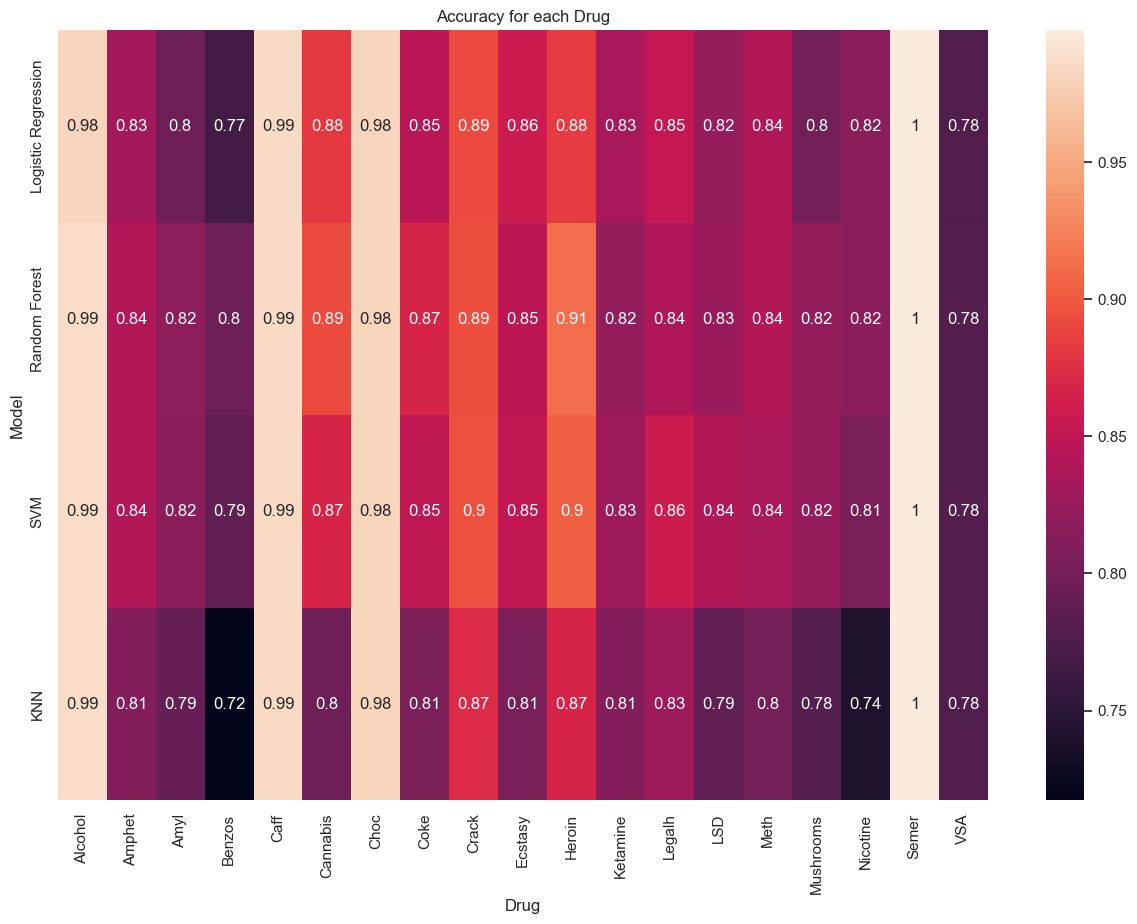

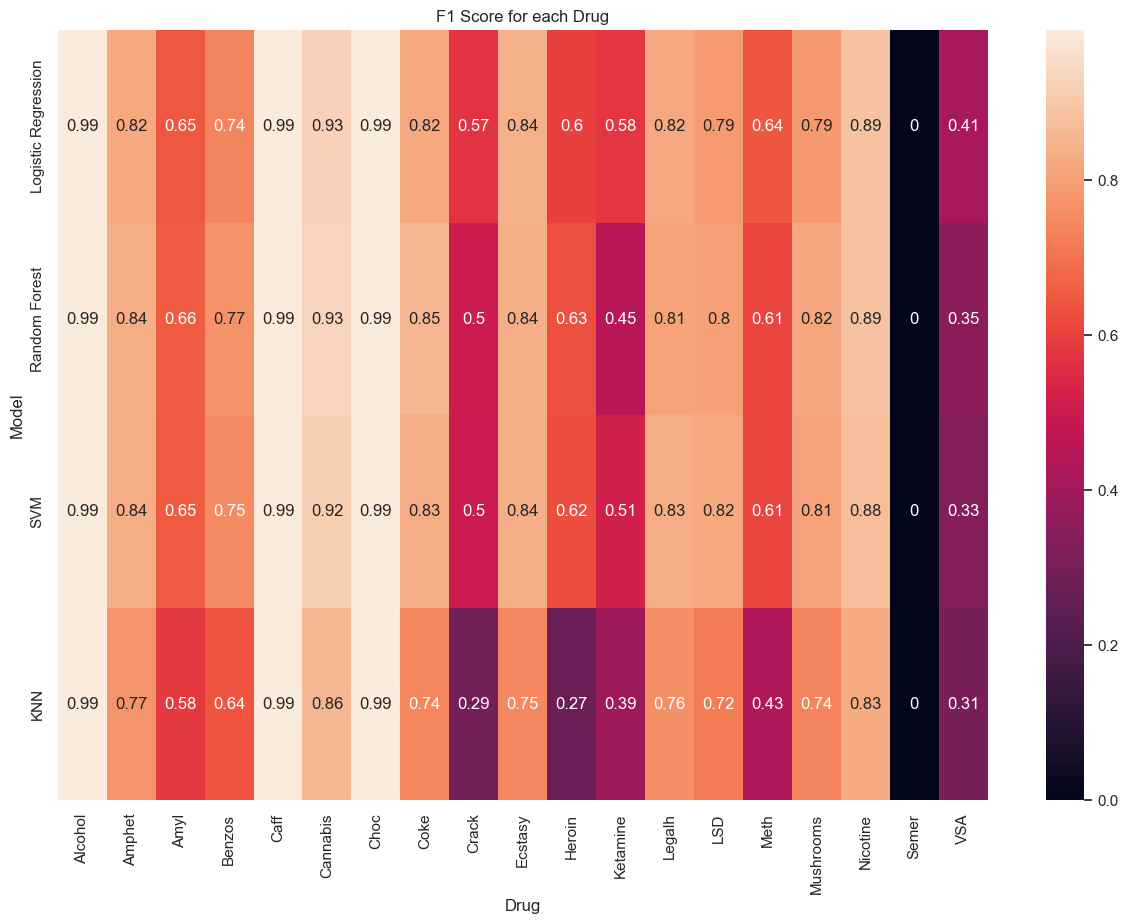

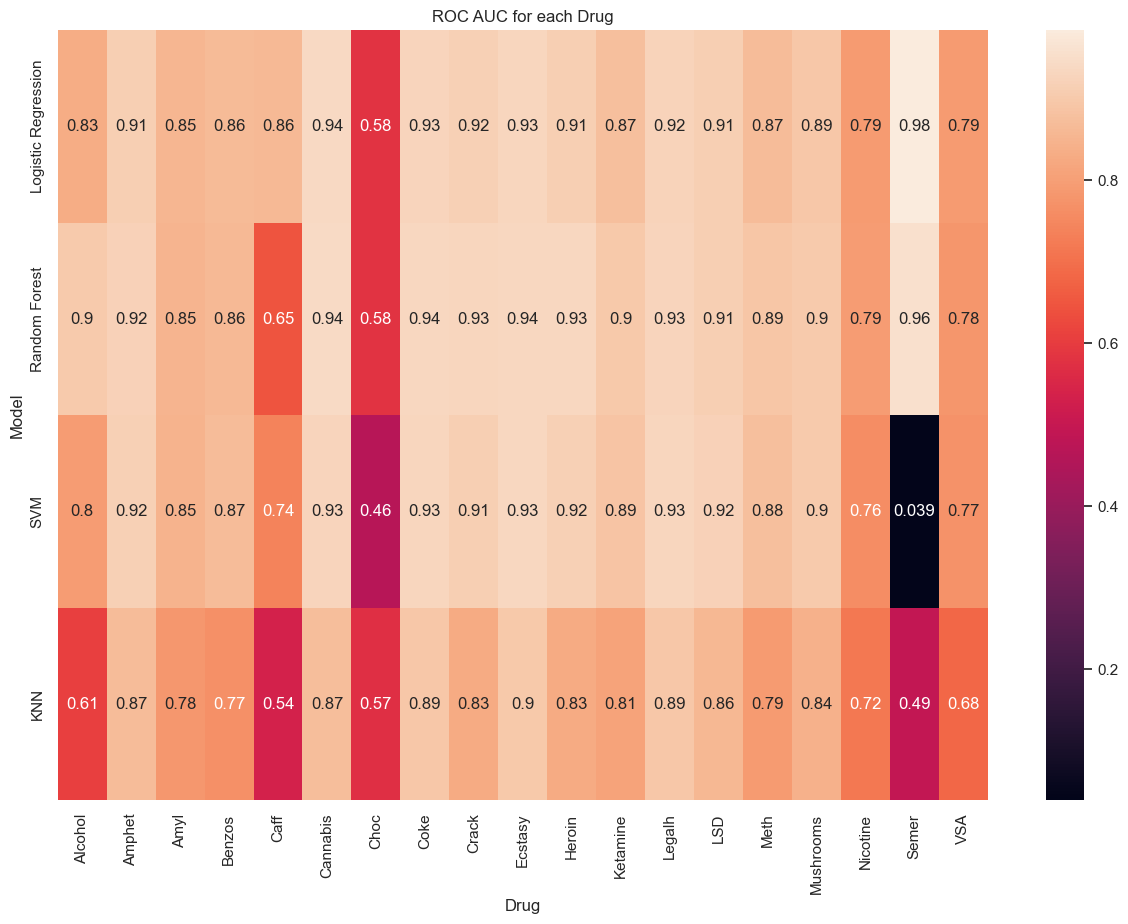

In [7]:
# Visualization of results
for metric in ['Accuracy', 'F1 Score', 'ROC AUC']:
    plt.figure(figsize=(15, 10))
    metric_results = {drug: {model: results[metric] for model, results in performances.items()}
                      for drug, performances in all_drug_performances.items()}
    
    sns.heatmap(pd.DataFrame(metric_results), annot=True)
    plt.title(f'{metric} for each Drug')
    plt.ylabel('Model')
    plt.xlabel('Drug')
    plt.show()

# Conclusion

Based on the provided visual data for the accuracy, F1 score, and ROC AUC across different models (Logistic Regression, Random Forest, SVM, and KNN), we can draw several conclusions about the predictive performance of each model for the various drugs.

### Model Robustness

- **Logistic Regression:** shows strength in the ROC AUC metric across drugs, suggesting it is effective at ranking its predictions and may be particularly useful when the cost of false negatives and false positives are different or when dealing with imbalanced datasets.

- **Random Forest:** seems to exhibit the most consistent accuracy across various drugs, indicating robustness in handling the dataset's variability.

- **SVM (Support Vector Machine):** may not be as consistent as the other models for all drugs, especially for Benzos and VSA. The model's performance on these drugs indicates that further investigation into feature selection or kernel choice may be necessary.

In light of these observations, while Random Forest and Logistic Regression demonstrate overall robustness, the choice of the model might still be influenced by the specific drug and the evaluation metric considered most critical for the application's needs.

## Top 5 Predictable Drugs

1. **Alcohol:** High scores across all models and metrics, indicating it's generally easier to predict alcohol use.

2. **Amphetamines (Amphet):** Consistently high accuracy and ROC AUC across models, suggesting clear patterns in the data for this drug.

3. **Cannabis:** High accuracy and F1 scores, especially with the Logistic Regression and Random Forest models.

4. **Ecstasy:** Random Forest and Logistic Regression models show high accuracy and F1 scores for this drug.

5. **Mushrooms:** Both accuracy and ROC AUC metrics are high for this drug, particularly in Random Forest and SVM models.


## Summary

When selecting a model for deployment, the choice might depend on the specific drug and the metric that is most important for the application. Random Forest stands out as a robust model across different drugs and metrics, making it a suitable general choice for this prediction task. Logistic Regression also proves to be a reliable model with consistent accuracy. SVM and KNN may be better suited for specific drugs where they show particularly high performance.

It's important to note that these conclusions are based on the provided visual data. For a more detailed analysis, we would need to examine the numerical values and the standard deviations of the metrics, as well as consider the balance of the classes in the dataset for each drug. Furthermore, the results are based on default parameters and hyperparameters; fine-tuning these could potentially improve the models' predictive performance.

# Chapter 2: Creating a verifiable model using Giza Actions

In this section we will be using giza actions and giza workspace to create a verfiable model. For now we will focus on using the Logistic Regression Model predicting the Ketamine consumption since it is one of the most controversial drug being tested for research puposes on modern medicine.

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve
import numpy as np
from giza_actions.action import Action, action
from giza_actions.task import task

columns_to_encode = ['Alcohol', 'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack',
                'Ecstasy', 'Heroin', 'Legalh', 'LSD', 'Meth', 'Mushrooms', 'Nicotine', 'Semer', 'VSA',
                     'Age', 'Gender', 'Education', 'Country', 'Ethnicity']

# List of all drug columns
drug_columns = [col for col in data.columns if col not in ['ID', 'Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore', 'Escore', 'Oscore', 'AScore', 'Cscore', 'Impulsive', 'SS']]
drug_columns.remove("Ketamine") # Don't include Ketamine on predictor variables

# List of additional variables to include in the features
additional_variables = ['Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore', 'Escore', 'Oscore', 'AScore', 'Cscore', 'Impulsive', 'SS']

# X = pd.DataFrame()
# y = pd.Series()

@task(name=f"Preprocess Dataset")
def preprocess_dataset():
    print("Preprocessing Dataset...")
    feature_columns = additional_variables + drug_columns# Don't include Ketamine on predictor variables
    X = data[feature_columns]
    X = pd.get_dummies(X, columns=columns_to_encode)
    # Convert current drug consumption into binary format
    # Target
    y = data["Ketamine"].apply(lambda x: 0 if x == 'CL0' else 1)
    return X, y

@task(name=f"Split Dataset")
def split_dataset(X, y):
    print("Splitting Dataset...")
    # Splitting data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    print("Dataset prepared successfully!!!")
    
    return X_train, X_test, y_train, y_test

# We can now start on training and testing a Random Forest Model
@task(name=f"Training Model")
def train_model(model, X_train, y_train):
    print("Traning the model...")
    X_train_contiguous = np.ascontiguousarray(X_train) #Ensure data is contiguous in memory
    model.fit(X_train_contiguous, y_train)
    print("Model trained sucessfully");
    return model

@task(name=f"Testing Model")
def test_model(model, X_test, y_test):
    """
    Test a machine learning model and evaluate its performance.

    Parameters:
    model: The machine learning model to be tested.
    X_test: Test data.
    y_test: True labels for test data.

    Returns:
    Tuple of (accuracy, F1 score, ROC-AUC score, predicted probabilities)
    """
    print("Testing the model...")
    X_test_contiguous = np.ascontiguousarray(X_test) #Ensure data is contiguous in memory
    y_pred = model.predict(X_test_contiguous)
    y_proba = model.predict_proba(X_test_contiguous)[:, 1]  # Probability estimates for ROC curve

    # Performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)
      
    #Print the result of the performance metrics line by line 
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC-AUC Score: {roc_auc:.4f}")
      
    print("Done testing the model...")
    return accuracy, f1, roc_auc, y_proba
      
@action(name=f"Execution", log_prints=True)
def execution():
    X, y = preprocess_dataset()
    X_train, X_test, y_train, y_test = split_dataset(X, y)
    #Create a Random Forest Model
    logreg = LogisticRegression(random_state=42)
    model = train_model(logreg, X_train, y_train)
    accuracy, f1, roc_auc, y_proba = test_model(model, X_test, y_test)
    
execution()

00:48:16.470 | INFO    | Created flow run 'translucent-snail' for flow 'Execution'

00:48:16.478 | INFO    | Action run 'translucent-snail' - View at https://actions-server-williamskie123-dblzzhtf5q-ew.a.run.app/flow-runs/flow-run/0d0cc2a4-c078-42ed-a3bc-4987d4ff21b2

00:48:17.550 | INFO    | Action run 'translucent-snail' - Created task run 'Preprocess Dataset-0' for task 'Preprocess Dataset'

00:48:17.554 | INFO    | Action run 'translucent-snail' - Executing 'Preprocess Dataset-0' immediately...

00:48:20.281 | INFO    | Task run 'Preprocess Dataset-0' - Preprocessing Dataset...

00:48:20.710 | INFO    | Task run 'Preprocess Dataset-0' - Finished in state Completed()

00:48:21.086 | INFO    | Action run 'translucent-snail' - Created task run 'Split Dataset-0' for task 'Split Dataset'

00:48:21.089 | INFO    | Action run 'translucent-snail' - Executing 'Split Dataset-0' immediately...

00:48:21.791 | INFO    | Task run 'Split Dataset-0' - Splitting Dataset...

00:48:21.801 | INFO    | Task run 'Split Dataset-0' - Dataset prepared successfully!!!

00:48:22.181 | INFO    | Task run 'Split Dataset-0' - Finished in state Completed()

00:48:22.535 | INFO    | Action run 'translucent-snail' - Created task run 'Training Model-0' for task 'Training Model'

00:48:22.539 | INFO    | Action run 'translucent-snail' - Executing 'Training Model-0' immediately...

00:48:23.213 | INFO    | Task run 'Training Model-0' - Traning the model...

00:48:23.278 | INFO    | Task run 'Training Model-0' - Model trained sucessfully

00:48:23.642 | INFO    | Task run 'Training Model-0' - Finished in state Completed()

00:48:23.999 | INFO    | Action run 'translucent-snail' - Created task run 'Testing Model-0' for task 'Testing Model'

00:48:24.002 | INFO    | Action run 'translucent-snail' - Executing 'Testing Model-0' immediately...

00:48:24.720 | INFO    | Task run 'Testing Model-0' - Testing the model...

00:48:24.745 | INFO    | Task run 'Testing Model-0' - Accuracy: 0.8339

00:48:24.750 | INFO    | Task run 'Testing Model-0' - F1 Score: 0.5766

00:48:24.753 | INFO    | Task run 'Testing Model-0' - ROC-AUC Score: 0.8736

00:48:24.756 | INFO    | Task run 'Testing Model-0' - Done testing the model...

00:48:25.128 | INFO    | Task run 'Testing Model-0' - Finished in state Completed()

00:48:25.509 | INFO    | Action run 'translucent-snail' - Finished in state Completed('All states completed.')

[Completed(message=None, type=COMPLETED, result=UnpersistedResult(type='unpersisted', artifact_type='result', artifact_description='Unpersisted result of type `tuple`')),
 Completed(message=None, type=COMPLETED, result=UnpersistedResult(type='unpersisted', artifact_type='result', artifact_description='Unpersisted result of type `tuple`')),
 Completed(message=None, type=COMPLETED, result=UnpersistedResult(type='unpersisted', artifact_type='result', artifact_description='Unpersisted result of type `LogisticRegression`')),
 Completed(message=None, type=COMPLETED, result=UnpersistedResult(type='unpersisted', artifact_type='result', artifact_description='Unpersisted result of type `tuple`'))]

In [9]:
from giza_actions.action import Action

if __name__ == '__main__':
    action_deploy = Action(entrypoint=execution, name="rf-ketamine-prediction")
    action_deploy.serve(name="rf-ketamine-prediction-deployment")

C:\Users\Predator\AppData\Local\Temp\ipykernel_46004\1012388944.py:5: RuntimeWarning: coroutine 'Action.serve' was never awaited
  action_deploy.serve(name="rf-ketamine-prediction-deployment")


In [10]:
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import FloatTensorType
import onnx


@task(name=f"Convert LogReg Model to ONNX")
def convert_logreg_to_onnx(model, onnx_file_path):
    """
    Convert a scikit-learn Logistic Regression model to ONNX format.

    Parameters:
    model (sklearn.linear_model.LogisticRegression): The Logistic Regression model to convert.
    onnx_file_path (str): The file path where the ONNX model will be saved.
    """
    # Check initial types - assuming model is for classification on float features
    # You might need to adjust this depending on your model input
    initial_type = [('float_input', FloatTensorType([None, model.n_features_in_]))]
    
    # Convert the model
    onnx_model = convert_sklearn(model, initial_types=initial_type)

    # Save to file
    with open(onnx_file_path, "wb") as f:
        f.write(onnx_model.SerializeToString())

    print(f"Model saved to {onnx_file_path}")

In [11]:
@action(name=f"Action: Convert To ONNX", log_prints=True)
def logreg_to_onnx_execution():
    X, y = preprocess_dataset()
    X_train, X_test, y_train, y_test = split_dataset(X, y)
    # Create a Logistic Regression Model
    logreg = LogisticRegression(random_state=42)
    model = train_model(logreg, X_train, y_train)
    accuracy, f1, roc_auc, y_proba = test_model(model, X_test, y_test)
    
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC-AUC Score: {roc_auc:.4f}")
    
    onnx_file_path = "logreg_ketamine.onnx"
    convert_logreg_to_onnx(model, onnx_file_path)

logreg_to_onnx_execution()

00:48:29.463 | INFO    | Created flow run 'mauve-marmoset' for flow 'Action: Convert To ONNX'

00:48:29.467 | INFO    | Action run 'mauve-marmoset' - View at https://actions-server-williamskie123-dblzzhtf5q-ew.a.run.app/flow-runs/flow-run/bb5f8051-3df7-486c-a590-0038ac048062

00:48:30.426 | INFO    | Action run 'mauve-marmoset' - Created task run 'Preprocess Dataset-0' for task 'Preprocess Dataset'

00:48:30.429 | INFO    | Action run 'mauve-marmoset' - Executing 'Preprocess Dataset-0' immediately...

00:48:31.451 | INFO    | Task run 'Preprocess Dataset-0' - Preprocessing Dataset...

00:48:31.837 | INFO    | Task run 'Preprocess Dataset-0' - Finished in state Completed()

00:48:32.195 | INFO    | Action run 'mauve-marmoset' - Created task run 'Split Dataset-0' for task 'Split Dataset'

00:48:32.199 | INFO    | Action run 'mauve-marmoset' - Executing 'Split Dataset-0' immediately...

00:48:32.858 | INFO    | Task run 'Split Dataset-0' - Splitting Dataset...

00:48:32.874 | INFO    | Task run 'Split Dataset-0' - Dataset prepared successfully!!!

00:48:33.228 | INFO    | Task run 'Split Dataset-0' - Finished in state Completed()

00:48:33.572 | INFO    | Action run 'mauve-marmoset' - Created task run 'Training Model-0' for task 'Training Model'

00:48:33.575 | INFO    | Action run 'mauve-marmoset' - Executing 'Training Model-0' immediately...

00:48:34.236 | INFO    | Task run 'Training Model-0' - Traning the model...

00:48:34.301 | INFO    | Task run 'Training Model-0' - Model trained sucessfully

00:48:34.646 | INFO    | Task run 'Training Model-0' - Finished in state Completed()

00:48:34.973 | INFO    | Action run 'mauve-marmoset' - Created task run 'Testing Model-0' for task 'Testing Model'

00:48:34.976 | INFO    | Action run 'mauve-marmoset' - Executing 'Testing Model-0' immediately...

00:48:35.636 | INFO    | Task run 'Testing Model-0' - Testing the model...

00:48:35.662 | INFO    | Task run 'Testing Model-0' - Accuracy: 0.8339

00:48:35.666 | INFO    | Task run 'Testing Model-0' - F1 Score: 0.5766

00:48:35.669 | INFO    | Task run 'Testing Model-0' - ROC-AUC Score: 0.8736

00:48:35.672 | INFO    | Task run 'Testing Model-0' - Done testing the model...

00:48:36.016 | INFO    | Task run 'Testing Model-0' - Finished in state Completed()

00:48:36.020 | INFO    | Action run 'mauve-marmoset' - Accuracy: 0.8339

00:48:36.024 | INFO    | Action run 'mauve-marmoset' - F1 Score: 0.5766

00:48:36.027 | INFO    | Action run 'mauve-marmoset' - ROC-AUC Score: 0.8736

00:48:36.391 | INFO    | Action run 'mauve-marmoset' - Created task run 'Convert LogReg Model to ONNX-0' for task 'Convert LogReg Model to ONNX'

00:48:36.394 | INFO    | Action run 'mauve-marmoset' - Executing 'Convert LogReg Model to ONNX-0' immediately...

00:48:37.074 | INFO    | Task run 'Convert LogReg Model to ONNX-0' - Model saved to logreg_ketamine.onnx

00:48:37.425 | INFO    | Task run 'Convert LogReg Model to ONNX-0' - Finished in state Completed()

00:48:37.781 | INFO    | Action run 'mauve-marmoset' - Finished in state Completed('All states completed.')

[Completed(message=None, type=COMPLETED, result=UnpersistedResult(type='unpersisted', artifact_type='result', artifact_description='Unpersisted result of type `tuple`')),
 Completed(message=None, type=COMPLETED, result=UnpersistedResult(type='unpersisted', artifact_type='result', artifact_description='Unpersisted result of type `tuple`')),
 Completed(message=None, type=COMPLETED, result=UnpersistedResult(type='unpersisted', artifact_type='result', artifact_description='Unpersisted result of type `LogisticRegression`')),
 Completed(message=None, type=COMPLETED, result=UnpersistedResult(type='unpersisted', artifact_type='result', artifact_description='Unpersisted result of type `tuple`')),
 Completed(message=None, type=COMPLETED, result=UnpersistedResult(type='unpersisted', artifact_type='result', artifact_description='Unpersisted result of type `NoneType`'))]

Since we're having trouble with converting our logistic regression with gizatech's transpiler. The option below is done to solve this issue by using pytorch to create our own logistic regression model

In [12]:
import torch
import torch.nn as nn
import torch.optim as optim

class LogisticRegressionPytorch(nn.Module):
    def __init__(self, input_size):
        super(LogisticRegressionPytorch, self).__init__()
        self.linear = nn.Linear(input_size, 1)
        self.activation = torch.sigmoid  # or nn.ReLU()

    def forward(self, x):
        return self.activation(self.linear(x))

# Define the input size based on your dataset
input_size = 162

# Initialize the model
model = LogisticRegressionPytorch(input_size)

# Define the loss function and optimizer
criterion = nn.BCELoss()  # or nn.BCEWithLogitsLoss() if using ReLU
learning_rate = 0.01  # Set an appropriate learning rate
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

X_train, X_test, y_train, y_test = split_dataset.fn(X, y)

# Training loop
@task(name=f"Train Model")
def train_model(model, num_epochs = 100): #default epochs 100
    inputs = torch.tensor(X_train.values.astype('float32'))
    labels = torch.tensor(y_train.values.astype('float32')).view(-1, 1)
    for epoch in range(num_epochs):
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Print loss every few epochs
        if epoch % 10 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

    print("✅ Model trained successfully")

C:\ProgramData\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


Splitting Dataset...
Dataset prepared successfully!!!


In [13]:
#For testing
from sklearn.metrics import accuracy_score, f1_score

@task(name=f"Test model")
def test_model(model):
    print("Testing model...")
    # Set the model to evaluation mode
    model.eval()
    
    inputs = torch.tensor(X_test.values.astype('float32'))
    labels = torch.tensor(y_test.values.astype('float32')).view(-1, 1)
    # Disable gradient calculations
    with torch.no_grad():
        outputs_test = model(inputs)

    # Convert outputs to binary predictions
    predicted = (outputs_test > 0.5).float()

    # Calculate accuracy and F1 score
    accuracy = accuracy_score(labels_test.numpy(), predicted.numpy())
    f1 = f1_score(labels_test.numpy(), predicted.numpy())

    print("✅ Model tested successfully")
    print(f'Accuracy: {accuracy:.4f}')
    print(f'F1 Score: {f1:.4f}')

In [14]:
@action(name=f"Exectuion: Logistic Regression Prediction", log_prints=True)
def execution():
    print("Execution: Model Training and Testing")
    train_model(model, 500)
    test_model(model)
    print("Testing Done...")
    
execution()

00:48:47.359 | INFO    | Created flow run 'solemn-catfish' for flow 'Exectuion: Logistic Regression Prediction'

00:48:47.364 | INFO    | Action run 'solemn-catfish' - View at https://actions-server-williamskie123-dblzzhtf5q-ew.a.run.app/flow-runs/flow-run/6eb72523-6b38-477a-a0db-d988cdfea6b3

00:48:48.038 | INFO    | Action run 'solemn-catfish' - Execution: Model Training and Testing

00:48:48.707 | INFO    | Action run 'solemn-catfish' - Created task run 'Train Model-0' for task 'Train Model'

00:48:48.710 | INFO    | Action run 'solemn-catfish' - Executing 'Train Model-0' immediately...

00:48:49.434 | INFO    | Task run 'Train Model-0' - Epoch [1/500], Loss: 0.7558

00:48:49.447 | INFO    | Task run 'Train Model-0' - Epoch [11/500], Loss: 0.6410

00:48:49.459 | INFO    | Task run 'Train Model-0' - Epoch [21/500], Loss: 0.5757

00:48:49.470 | INFO    | Task run 'Train Model-0' - Epoch [31/500], Loss: 0.5370

00:48:49.485 | INFO    | Task run 'Train Model-0' - Epoch [41/500], Loss: 0.5129

00:48:49.497 | INFO    | Task run 'Train Model-0' - Epoch [51/500], Loss: 0.4971

00:48:49.510 | INFO    | Task run 'Train Model-0' - Epoch [61/500], Loss: 0.4861

00:48:49.523 | INFO    | Task run 'Train Model-0' - Epoch [71/500], Loss: 0.4781

00:48:49.537 | INFO    | Task run 'Train Model-0' - Epoch [81/500], Loss: 0.4720

00:48:49.549 | INFO    | Task run 'Train Model-0' - Epoch [91/500], Loss: 0.4672

00:48:49.561 | INFO    | Task run 'Train Model-0' - Epoch [101/500], Loss: 0.4633

00:48:49.574 | INFO    | Task run 'Train Model-0' - Epoch [111/500], Loss: 0.4599

00:48:49.586 | INFO    | Task run 'Train Model-0' - Epoch [121/500], Loss: 0.4571

00:48:49.597 | INFO    | Task run 'Train Model-0' - Epoch [131/500], Loss: 0.4545

00:48:49.609 | INFO    | Task run 'Train Model-0' - Epoch [141/500], Loss: 0.4523

00:48:49.623 | INFO    | Task run 'Train Model-0' - Epoch [151/500], Loss: 0.4502

00:48:49.635 | INFO    | Task run 'Train Model-0' - Epoch [161/500], Loss: 0.4483

00:48:49.648 | INFO    | Task run 'Train Model-0' - Epoch [171/500], Loss: 0.4466

00:48:49.662 | INFO    | Task run 'Train Model-0' - Epoch [181/500], Loss: 0.4450

00:48:49.673 | INFO    | Task run 'Train Model-0' - Epoch [191/500], Loss: 0.4435

00:48:49.685 | INFO    | Task run 'Train Model-0' - Epoch [201/500], Loss: 0.4421

00:48:49.697 | INFO    | Task run 'Train Model-0' - Epoch [211/500], Loss: 0.4408

00:48:49.711 | INFO    | Task run 'Train Model-0' - Epoch [221/500], Loss: 0.4395

00:48:49.723 | INFO    | Task run 'Train Model-0' - Epoch [231/500], Loss: 0.4384

00:48:49.734 | INFO    | Task run 'Train Model-0' - Epoch [241/500], Loss: 0.4373

00:48:49.747 | INFO    | Task run 'Train Model-0' - Epoch [251/500], Loss: 0.4362

00:48:49.759 | INFO    | Task run 'Train Model-0' - Epoch [261/500], Loss: 0.4353

00:48:49.770 | INFO    | Task run 'Train Model-0' - Epoch [271/500], Loss: 0.4343

00:48:49.785 | INFO    | Task run 'Train Model-0' - Epoch [281/500], Loss: 0.4334

00:48:49.799 | INFO    | Task run 'Train Model-0' - Epoch [291/500], Loss: 0.4326

00:48:49.813 | INFO    | Task run 'Train Model-0' - Epoch [301/500], Loss: 0.4318

00:48:49.826 | INFO    | Task run 'Train Model-0' - Epoch [311/500], Loss: 0.4310

00:48:49.839 | INFO    | Task run 'Train Model-0' - Epoch [321/500], Loss: 0.4303

00:48:49.851 | INFO    | Task run 'Train Model-0' - Epoch [331/500], Loss: 0.4296

00:48:49.863 | INFO    | Task run 'Train Model-0' - Epoch [341/500], Loss: 0.4289

00:48:49.876 | INFO    | Task run 'Train Model-0' - Epoch [351/500], Loss: 0.4283

00:48:49.888 | INFO    | Task run 'Train Model-0' - Epoch [361/500], Loss: 0.4276

00:48:49.901 | INFO    | Task run 'Train Model-0' - Epoch [371/500], Loss: 0.4270

00:48:49.914 | INFO    | Task run 'Train Model-0' - Epoch [381/500], Loss: 0.4265

00:48:49.925 | INFO    | Task run 'Train Model-0' - Epoch [391/500], Loss: 0.4259

00:48:49.939 | INFO    | Task run 'Train Model-0' - Epoch [401/500], Loss: 0.4254

00:48:49.952 | INFO    | Task run 'Train Model-0' - Epoch [411/500], Loss: 0.4249

00:48:49.965 | INFO    | Task run 'Train Model-0' - Epoch [421/500], Loss: 0.4244

00:48:49.978 | INFO    | Task run 'Train Model-0' - Epoch [431/500], Loss: 0.4239

00:48:49.990 | INFO    | Task run 'Train Model-0' - Epoch [441/500], Loss: 0.4234

00:48:50.002 | INFO    | Task run 'Train Model-0' - Epoch [451/500], Loss: 0.4230

00:48:50.015 | INFO    | Task run 'Train Model-0' - Epoch [461/500], Loss: 0.4226

00:48:50.028 | INFO    | Task run 'Train Model-0' - Epoch [471/500], Loss: 0.4221

00:48:50.042 | INFO    | Task run 'Train Model-0' - Epoch [481/500], Loss: 0.4217

00:48:50.056 | INFO    | Task run 'Train Model-0' - Epoch [491/500], Loss: 0.4213

00:48:50.067 | INFO    | Task run 'Train Model-0' - ✅ Model trained successfully

00:48:50.429 | INFO    | Task run 'Train Model-0' - Finished in state Completed()

00:48:50.835 | INFO    | Action run 'solemn-catfish' - Created task run 'Test model-0' for task 'Test model'

00:48:50.839 | INFO    | Action run 'solemn-catfish' - Executing 'Test model-0' immediately...

00:48:51.537 | INFO    | Task run 'Test model-0' - Testing model...

00:48:51.548 | INFO    | Task run 'Test model-0' - name 'labels_test' is not defined

00:48:51.912 | INFO    | Task run 'Test model-0' - Finished in state Completed()

00:48:51.917 | INFO    | Action run 'solemn-catfish' - Testing Done...

00:48:52.270 | INFO    | Action run 'solemn-catfish' - Finished in state Completed('All states completed.')

[Completed(message=None, type=COMPLETED, result=UnpersistedResult(type='unpersisted', artifact_type='result', artifact_description='Unpersisted result of type `NoneType`')),
 Completed(message=None, type=COMPLETED, result=UnpersistedResult(type='unpersisted', artifact_type='result', artifact_description='Unpersisted result of type `NoneType`'))]

In [15]:
import torch
import torch.onnx

@action(name="Model Conversion to ONNX")
def onnx_model_conversion():
    # Assuming 'input_size' is the size of model's input
    dummy_input = torch.randn(1, input_size, dtype=torch.float32)

    # Set the model to evaluation mode
    model.eval()

    # Export the model
    torch.onnx.export(model,               # model being run
                      dummy_input,         # model input (or a tuple for multiple inputs)
                      "logreg_model.onnx",        # where to save the model (can be a file or file-like object)
                      export_params=True,  # store the trained parameter weights inside the model file
                      opset_version=10,    # the ONNX version to export the model to
                      do_constant_folding=True,  # whether to execute constant folding for optimization
                      input_names = ['input'],   # the model's input names
                      output_names = ['output'], # the model's output names
                      dynamic_axes={'input' : {0 : 'batch_size'},    # variable length axes
                                    'output' : {0 : 'batch_size'}})
    
onnx_model_conversion()

00:48:53.702 | INFO    | Created flow run 'radiant-donkey' for flow 'Model Conversion to ONNX'

00:48:53.705 | INFO    | Action run 'radiant-donkey' - View at https://actions-server-williamskie123-dblzzhtf5q-ew.a.run.app/flow-runs/flow-run/9ab3d610-d5c6-4824-b702-5f992399627e

00:48:54.785 | INFO    | Action run 'radiant-donkey' - Finished in state Completed()

In [16]:
import onnx

# Load the ONNX model
model = onnx.load("logreg_model.onnx")

# Iterate through each node in the model's graph
for node in model.graph.node:
    print(f"Operator Type: {node.op_type}")
    # Optionally, print more details about the node
    print(f"Input(s): {node.input}, Output(s): {node.output}")
    print("---")

Operator Type: Gemm
Input(s): ['input', 'linear.weight', 'linear.bias'], Output(s): ['/linear/Gemm_output_0']
---
Operator Type: Sigmoid
Input(s): ['/linear/Gemm_output_0'], Output(s): ['output']
---


## Running a Verifiable Prediction

In [25]:
from giza_actions.model import GizaModel

@task(name='Prediction with Cairo')
def prediction(X_test, model_id, version_id):
    # Initialize a GizaModel with model and version id.
    model = GizaModel(
        id=model_id,
        version=version_id
    )
    
    # Call the predict function. 
    #Set `verifiable` to True, and define the expecting output datatype.
    (result, request_id) = model.predict(
        input_feed={"X_test": X_test}, 
        verifiable=True
    )
    print(result)
    print(request_id)
    return (result, request_id)

@action(name='Execution: Prediction with Cairo', log_prints=True)
def execution():
    ## Sample from first data from X_test
    (result, request_id) = prediction(X_test.values[1].astype('float32').reshape(1, 162), 247, 7) #log_reg ketamine
    
    return result, request_id

execution()

C:\Users\Predator\AppData\Roaming\Python\Python311\site-packages\prefect\tasks.py:337: UserWarning: A task named 'Prediction with Cairo' and defined at 'C:\Users\Predator\AppData\Roaming\Python\Python311\site-packages\giza_actions\task.py:3' conflicts with another task. Consider specifying a unique `name` parameter in the task definition:

 `@task(name='my_unique_name', ...)`
  warnings.warn(
C:\Users\Predator\AppData\Roaming\Python\Python311\site-packages\prefect\flows.py:338: UserWarning: A flow named 'Execution: Prediction with Cairo' and defined at 'C:\Users\Predator\AppData\Roaming\Python\Python311\site-packages\giza_actions\action.py:21' conflicts with another flow. Consider specifying a unique `name` parameter in the flow definition:

 `@flow(name='my_unique_name', ...)`
  warnings.warn(


00:51:42.686 | INFO    | Created flow run 'spectral-coua' for flow 'Execution: Prediction with Cairo'

00:51:42.690 | INFO    | Action run 'spectral-coua' - View at https://actions-server-williamskie123-dblzzhtf5q-ew.a.run.app/flow-runs/flow-run/11f5d1c5-4ca3-406a-a36b-9ff27b8aa9aa

00:51:43.684 | INFO    | Action run 'spectral-coua' - Created task run 'Prediction with Cairo-0' for task 'Prediction with Cairo'

00:51:43.688 | INFO    | Action run 'spectral-coua' - Executing 'Prediction with Cairo-0' immediately...

🚀 Starting deserialization process...
✅ Deserialization completed! 🎉


00:51:49.041 | INFO    | Task run 'Prediction with Cairo-0' - [[0.19548035]]

00:51:49.043 | INFO    | Task run 'Prediction with Cairo-0' - "ac573afd82f94fda99e96aedaf07c65b"

00:51:49.396 | INFO    | Task run 'Prediction with Cairo-0' - Finished in state Completed()

00:51:49.750 | INFO    | Action run 'spectral-coua' - Finished in state Completed()

(array([[0.19548035]]), '"ac573afd82f94fda99e96aedaf07c65b"')

In [27]:
import requests
from giza import API_HOST

# Update the following variables with your specific details
MODEL_ID = 247
VERSION_ID = 7
DEPLOYMENT_ID = 8
REQUEST_ID = "cf34677918b541fabcbac2665cb6351a"
API_KEY = '**********************' ##needed to be masked when uploaded to a github repo

url = f'{API_HOST}/api/v1/models/{MODEL_ID}/versions/{VERSION_ID}/deployments/{DEPLOYMENT_ID}/proofs/{REQUEST_ID}:download'
headers = {"X-API-KEY": API_KEY}
d_url = requests.get(url, headers=headers).json()["download_url"]
proof = requests.get(d_url)

with open("zk_logreg_ketamine.proof", "wb") as f:
     f.write(proof.content)

In [19]:
#Run the following command on the CMD within the local directory to verify the proof 
#giza verify --proof zk_logreg_ketamine.proof